# Team members

| Id        | Student                                 |
|-----------|-----------------------------------------|
| A01795654 | Raul Astorga Castro                     |
| A01795579 | Edson Misael Astorga Castro             |
| A01373679 | Luis Miguel Balderas González de Burgos |
| A01730466 | Sinaí Avalos Rivera                     |
| A01410682 | Carlos Miguel Arvizu Durán              |

# Fidings

On the first try we tried to train diferent models using the same optimizer, however this wasn't working. 
The correct path to follow was create a diferent optimizer for each model.

Besides Resnet, VGG and GoogLeNet were able to get a good accuracy. The number of input data on the last FC layer only had to be 
adapted to work whit those new models

# TC 5033
## Deep Learning
## Convolutional Neural Networks
<br>

#### Activity 2b: Building a CNN for CIFAR10 dataset with PyTorch
<br>

- Objective

    The main goal of this activity is to further your understanding of Convolutional Neural Networks (CNNs) by building one using PyTorch. You will apply this architecture to the famous CIFAR10 dataset, taking what you've learned from the guide code that replicated the Fully Connected model in PyTorch (Activity 2a).

- Instructions
    This activity requires submission in teams of 5 or 6 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Understand the Guide Code: Review the guide code from Activity 2a that implemented a Fully Connected model in PyTorch. Note how PyTorch makes it easier to implement neural networks.

    Familiarize Yourself with CNNs: Take some time to understand their architecture and the rationale behind using convolutional layers.

    Prepare the Dataset: Use PyTorch's DataLoader to manage the dataset. Make sure the data is appropriately preprocessed for a CNN.

    Design the CNN Architecture: Create a new architecture that incorporates convolutional layers. Use PyTorch modules like nn.Conv2d, nn.MaxPool2d, and others to build your network.

    Training Loop and Backpropagation: Implement the training loop, leveraging PyTorch’s autograd for backpropagation. Keep track of relevant performance metrics.

    Analyze and Document: Use Markdown cells to explain your architectural decisions, performance results, and any challenges you faced. Compare this model with your previous Fully Connected model in terms of performance and efficiency.

- Evaluation Criteria

    - Understanding of CNN architecture and its application to the CIFAR10 dataset
    - Code Readability and Comments
    - Appropriateness and efficiency of the chosen CNN architecture
    - Correct implementation of Traning Loop and Accuracy Function
    - Model's performance metrics on the CIFAR10 dataset (at least 65% accuracy)
    - Quality of Markdown documentation

- Submission

Submit via Canvas your Jupyter Notebook with the CNN implemented in PyTorch. Your submission should include well-commented code and Markdown cells that provide a comprehensive view of your design decisions, performance metrics, and learnings.

## Import files and libraries required for the model training

## Libraries

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
import matplotlib.pyplot as plt

#only if you have jupyterthemes
from jupyterthemes import jtplot
jtplot.style()

### Download Cifar10 dataset

In [2]:
# Path where the datasets will be downloaded
DATA_PATH = './cifar-10'

# Constants with training, validation and testing sizes
NUM_TRAIN = 50000
NUM_VAL = 5000
NUM_TEST = 5000

# Size of the minibatches
MINIBATCH_SIZE = 64

# Transforms is used to declare transformations to images:
# - Convert to tensor
# - Normalization with the mean and standard deviation for each channel
transform_cifar = T.Compose([
                T.ToTensor(),
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
            ])

# Train dataset
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_cifar)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE, 
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))
#Validation set
cifar10_val = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                           transform=transform_cifar)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE, 
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))
#Test set
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True, 
                            transform=transform_cifar)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL, len(cifar10_test))))

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


### Print and validate datasets

In [3]:
# Validate if the GPU is available
#torch.cuda.is_available()

# Validate if the Mac Apple Silicon GPU is available
torch.backends.mps.is_available()

True

In [4]:
# Printing the training dataset with its respective transformations, size, path of the dataset files and type of dataset (train)
cifar10_train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./cifar-10
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

In [5]:
# Printing minibatches size in the Loader
train_loader.batch_size

64

In [6]:
# Loop through batches in the Training Loader and print out the x and y values
for i, (x, y) in enumerate(train_loader):
    # X value is a variable with of four dimensions that indicates the number of imanges, 
    # number of channels, and the last two indicates the number of pixels 
    # Y value only shows a dimension that represents the number of images that x should have

    print(x.shape, y.shape)

torch.Size([64, 3, 32, 32]) torch.Size([64])
torch.Size([64, 3, 32, 32]) torch.Size([64])
torch.Size([64, 3, 32, 32]) torch.Size([64])
torch.Size([64, 3, 32, 32]) torch.Size([64])
torch.Size([64, 3, 32, 32]) torch.Size([64])
torch.Size([64, 3, 32, 32]) torch.Size([64])
torch.Size([64, 3, 32, 32]) torch.Size([64])
torch.Size([64, 3, 32, 32]) torch.Size([64])
torch.Size([64, 3, 32, 32]) torch.Size([64])
torch.Size([64, 3, 32, 32]) torch.Size([64])
torch.Size([64, 3, 32, 32]) torch.Size([64])
torch.Size([64, 3, 32, 32]) torch.Size([64])
torch.Size([64, 3, 32, 32]) torch.Size([64])
torch.Size([64, 3, 32, 32]) torch.Size([64])
torch.Size([64, 3, 32, 32]) torch.Size([64])
torch.Size([64, 3, 32, 32]) torch.Size([64])
torch.Size([64, 3, 32, 32]) torch.Size([64])
torch.Size([64, 3, 32, 32]) torch.Size([64])
torch.Size([64, 3, 32, 32]) torch.Size([64])
torch.Size([64, 3, 32, 32]) torch.Size([64])
torch.Size([64, 3, 32, 32]) torch.Size([64])
torch.Size([64, 3, 32, 32]) torch.Size([64])
torch.Size

## Using  GPU

In [64]:
if torch.cuda.is_available():
    device = torch.device('cuda') # GPU will be used if available
elif torch.backends.mps.is_available():
    device = torch.device('mps') # GPU will be used in Apple Silicon Macs if available
else:
    device = torch.device('cpu') # CPU will be used if GPU is not available
print(device)

mps


## Plot samples

La imagen muestreada representa un: ship


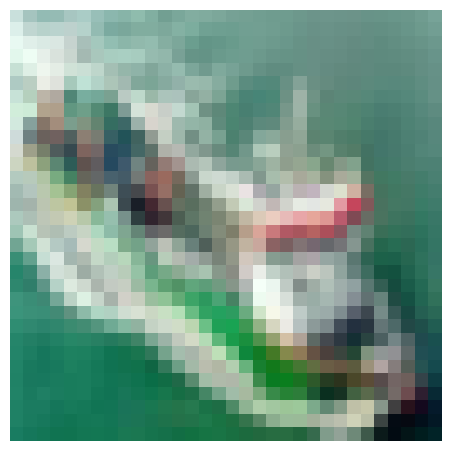

In [65]:
# Create an array with the name of the different classes (in string) in the test dataset
classes = test_loader.dataset.classes

# Function to print images on screen
def plot_figure(image):
    plt.imshow(np.transpose(image,(1,2,0))) 
    plt.axis('off')
    plt.show()

# A random index is generated on the full size of the test dataset
rnd_sample_idx = np.random.randint(len(test_loader))

# Takes the index and prints the string class that represents that index
print(f'The sampled image represents a: {classes[test_loader.dataset[rnd_sample_idx][1]]}')

# Extract the image from the test dataset that corresponds to the previously generated index
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )

# Print the image on the screen
plot_figure(image)


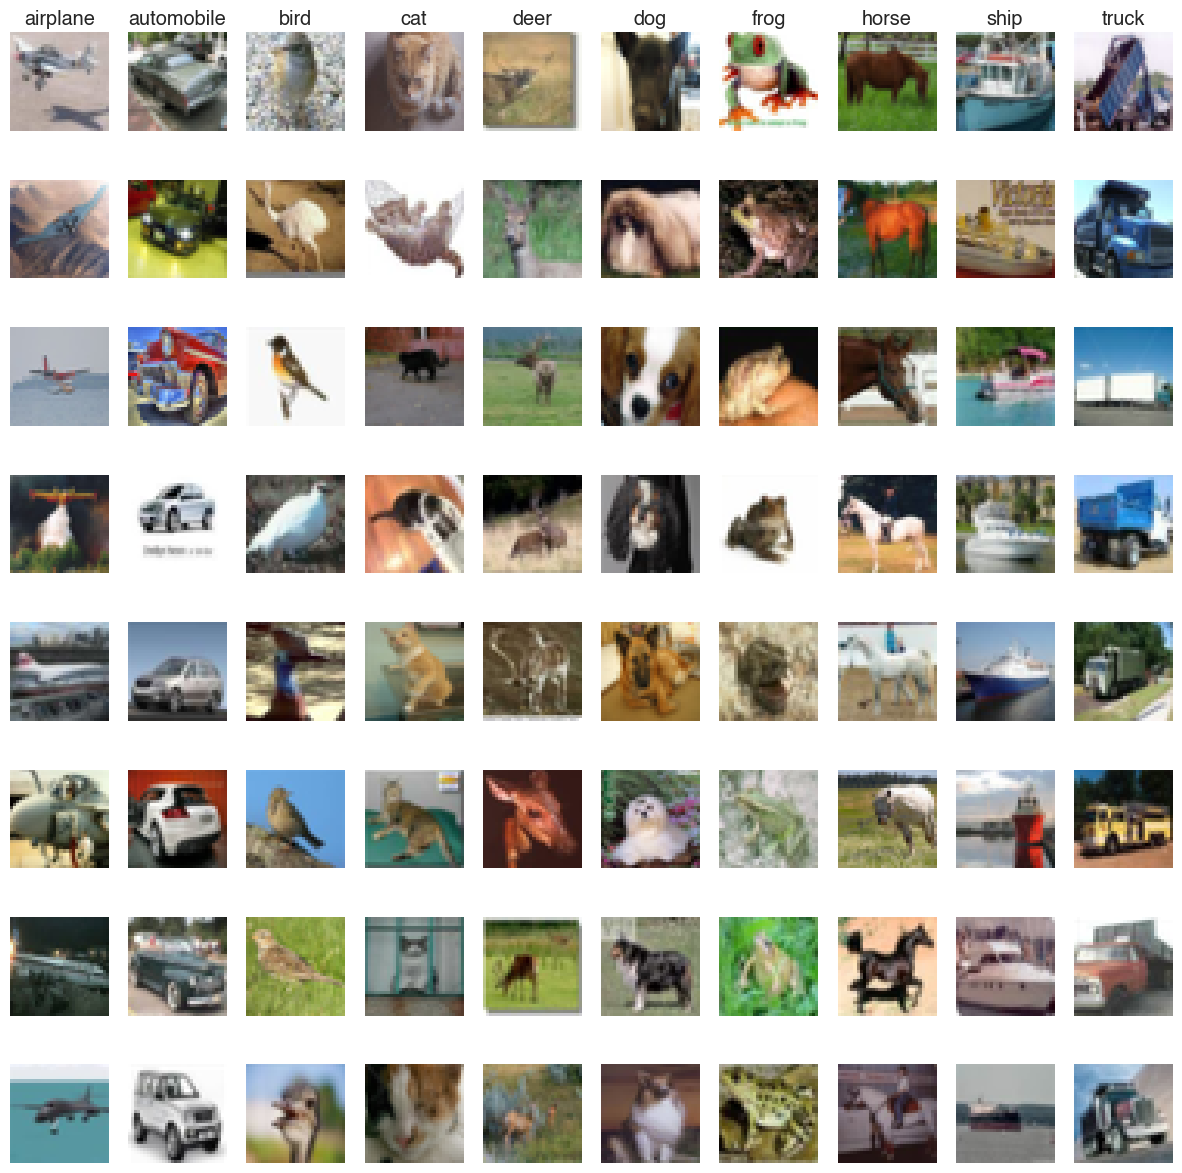

In [66]:
def plot_cifar10_grid():
    """
    Displays a grid of 10 columns with the different classes of cifar10 and 8 examples for each

    Args:
    None.

    Returns:
    None. Displays the grid with 80 images
    """
    classes = test_loader.dataset.classes #On classes we save the name of the classes from the dataset
    total_samples = 8 # Number of items to print per class
    plt.figure(figsize=(15,15))
    for label, sample in enumerate(classes):
        #The classes that match with the searched index are gotten
        class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets))  
        #Randomly 8 indices are selected from teh list of indices
        sample_idxs = np.random.choice(class_idxs, total_samples, replace = False)
        #Loops through the randomly selected image indices for the current class
        for i, idx in enumerate(sample_idxs):
            plt_idx = i*len(classes) + label + 1
            plt.subplot(total_samples, len(classes), plt_idx)
            plt.imshow(test_loader.dataset.data[idx])
            plt.axis('off')
            
            if i == 0: plt.title(sample)
    plt.show()

plot_cifar10_grid() 

## Calculate Accuracy

In [67]:
def accuracy(model, loader):
    """
    Calculates the accuracy of the model depending of the loader (train, test, validation)

    Args:
    model: Feature set
    loader: Dataset with features and labels

    Returns:
    float: Model accuracy
    """
    num_correct = 0 #First we intialize the variables
    num_total = 0
    model.eval() # This function set the model on evaluation, then it will not compute the gradiants of the parameters
    model = model.to(device=device) # The model is charged on the device, on the gpu
    with torch.no_grad(): # We set this function to make sure no gradiants are compute
        for xi, yi in loader:
            xi = xi.to(device=device, dtype = torch.float32) # Each image and correct class of the image is charged on the GPU
            yi = yi.to(device=device, dtype = torch.long)
            scores = model(xi)  # mb_size, 10 With this function all the model runs and calculates its scores
            _, pred = scores.max(dim=1)  #pred shape (mb_size ) 
            # the predicted labels are compared with the true labels and get summed all the right answers
            num_correct += (pred == yi).sum()  
            num_total += pred.size(0) 
        # Returns the ratio of correctly predicted samples to the total number of samples
        return float(num_correct)/num_total   

## Training loop

In [68]:
def train(model, optimiser, epochs=100):
    """
    Train the model using the minibatch gradient descent algorithm

    Args:
    model: The model to train
    optimiser: The optimizer used to update the model's weights
    epochs: The number of times the training loop will run over the entire dataset
    """
    model = model.to(device=device)# With this function we charge the model on the device, on the gpu
    for epoch in range(epochs):
        for i, (xi, yi) in enumerate(train_loader):
            model.train()# Now we set the model on train mode, then it computes the gradiants
            xi = xi.to(device=device, dtype=torch.float32)
            yi = yi.to(device=device, dtype=torch.long)
            scores = model(xi)  #Once we charge the images on the GPU the model computes all the variables on the NN
            cost = F.cross_entropy(input= scores, target=yi)  #And with this we get the probability precisión of the calculus
            optimiser.zero_grad()   # This lines cleans the old gradiants calculated        
            cost.backward() # Then we compute the gradiants of the loss
            optimiser.step()  # Then we perform the update of the nn              
        acc = accuracy(model, val_loader) 
        print(f'Epoch: {epoch}, cost: {cost.item()}, accuracy: {acc},')

## Linear model

In [69]:
# Neurons hidden layer 1
hidden1 = 256
# Neurons output hidden layer 1 and input to hidden layer 2
hidden = 256
# Learning rate
lr = 0.001
# Number of epochs
epochs = 10

# The Sequential type model is initialized with 3 linear layers
model1 = nn.Sequential(nn.Flatten(),
                       nn.Linear(in_features=32*32*3, out_features=hidden1), nn.ReLU(),
                       nn.Linear(in_features=hidden1, out_features=hidden), nn.ReLU(),
                       nn.Linear(in_features=hidden, out_features=10))

# Using Adam as optimization function for updating the weights
optimiser = torch.optim.Adam(model1.parameters(), lr=lr)

In [70]:
# Starts training
train(model1, optimiser, epochs)

Epoch: 0, costo: 1.24627685546875, accuracy: 0.4764,
Epoch: 1, costo: 1.6922101974487305, accuracy: 0.4888,
Epoch: 2, costo: 1.2152478694915771, accuracy: 0.5078,
Epoch: 3, costo: 1.0201690196990967, accuracy: 0.5264,
Epoch: 4, costo: 1.4216163158416748, accuracy: 0.533,
Epoch: 5, costo: 1.0347133874893188, accuracy: 0.5318,
Epoch: 6, costo: 1.0389013290405273, accuracy: 0.5242,
Epoch: 7, costo: 1.4375946521759033, accuracy: 0.5354,
Epoch: 8, costo: 1.1760303974151611, accuracy: 0.5306,
Epoch: 9, costo: 1.0007730722427368, accuracy: 0.5218,


In [109]:
# Printing accuracy of the Linear model
accuracy(model1, test_loader)

0.5106

## Sequential CNN

In [71]:
# An anonymous function is declared to abstract the use of convolutional layers with a 3x3 kernel and a padding of 1
conv_k_3 = lambda channel1, channel2: nn.Conv2d(channel1, channel2, kernel_size=3, padding=1)

In [72]:
class CNN_class4(nn.Module):
    
    def __init__(self, in_channel, channel1, channel2):
        """
        Constructor function of the class to declare the properties of the convolutional neural network
        
        Args:
        in_channel: input channels
        channel1: output channels of layer 1 and input channels of layer 2
        channel2: output channels of layer 2
        """

        # The constructor of class nn.Module is executed by inheritance
        super().__init__()

        # Layer 1
        # The 1st convolutional layer is declared by instantiating the anonymous class with the input and output channels
        self.conv1 = conv_k_3(in_channel, channel1)
        # The output information of the 1st convolutional layer is normalized
        self.bn1 = nn.BatchNorm2d(channel1)

        # Layer 2
        # The 2nd convolutional layer is declared by instantiating the anonymous class with the input and output channels
        self.conv2 = conv_k_3(channel1, channel2)
        # The output information of the 2nd convolutional layer is normalized
        self.bn2 = nn.BatchNorm2d(channel2)

        # MaxPooling is applied to reduce output dimensions
        self.max_pool = nn.MaxPool2d(2,2)

    def forward(self, x):
        # The different layers previously declared in the constructor are executed in an orderly manner, passing the result of the previous one as a parameter
        x = F.relu(self.bn2(self.conv2(F.relu(self.bn1(self.conv1(x))))))
        return self.max_pool(x)

In [106]:
# Output channels for the 1st convolutional layer and input channels for the 2nd convolutional layer
channel1 = 64

# Output channels for the 2nd layer and input for the 3rd
channel2 = 128

# Output channels for the 3rd layer and input for the 4th
channel3 = 256

# Output channels for the 4th layer
channel4 = 512

# Number of epochs
epochs = 10

# Learning rate
lr = 0.0007

# Model is declared with CNN and Linear layers
modelCNN5 = nn.Sequential(CNN_class4(3,channel1, channel2), #3 RGB input channels
                          CNN_class4(channel2, channel4, channel4),
                          nn.Flatten(),
                          nn.Linear(in_features=8*8*channel4, out_features=10))

# Using Adam as optimization function for updating the weights
optimiser = torch.optim.Adam(modelCNN5.parameters(), lr)

In [107]:
# Starts training
train(modelCNN5, optimiser, epochs)

Epoch: 0, costo: 0.7398554682731628, accuracy: 0.6074,
Epoch: 1, costo: 1.0035512447357178, accuracy: 0.6994,
Epoch: 2, costo: 1.4856947660446167, accuracy: 0.7782,
Epoch: 3, costo: 0.29015082120895386, accuracy: 0.7768,
Epoch: 4, costo: 0.39804238080978394, accuracy: 0.7674,
Epoch: 5, costo: 0.42197126150131226, accuracy: 0.8026,
Epoch: 6, costo: 0.06313931941986084, accuracy: 0.8014,
Epoch: 7, costo: 0.1034119501709938, accuracy: 0.8104,
Epoch: 8, costo: 0.08699540793895721, accuracy: 0.8294,
Epoch: 9, costo: 0.07627183943986893, accuracy: 0.825,


In [108]:
# Printing accuracy of the CNN model
accuracy(modelCNN5, test_loader)

0.8208